<div align="center">
    <font color="0F5298" size="7">
        Deep Learning <br>
    </font>
    <font color="2565AE" size="5">
        CE Department <br>
        Spring 2024 - Prof. Soleymani Baghshah <br>
    </font>
    <font color="3C99D" size="5">
        HW2 Practical <br>
    </font>
    <font color="696880" size="5">
        30 Points
    </font>
</div>


# Q3. License Plate Detection and Recognition (30 points)

## Introduction

In this assignment, we will build a two-stage license plate recognition system:

1. First stage: Detect license plates in an image (license plate detection / LPD)
2. Second stage: Recognize characters within the detected license plate (license plate recognition / LPR)

This approach is not explicitly an OCR (Optical Character Recognition), but it has some similarities with important differences. Unlike general OCR which often relies on sequence models (like RNNs or Transformers) to capture language context, license plates have a fixed format with predictable structure. This allows us to use multi-class classification or object detection models for it - first to locate plates, then to locate and classify individual characters.

## Background on YOLO (You Only Look Once)

### Evolution of Object Detection

Object detection has evolved significantly over the years:
- **Two-stage detectors** (like R-CNN family): First propose regions, then classify them
- **Single-stage detectors** (like YOLO and SSD): Predict bounding boxes and classes in a single forward pass

YOLO revolutionized object detection by framing it as a regression problem rather than a classification problem. Instead of generating region proposals and then classifying each region (a slow, two-stage process), YOLO divides the image into a grid and predicts bounding boxes and class probabilities directly in a single forward pass.

### YOLO Architecture

![YOLO Architecture](https://velog.velcdn.com/images/hunniee_j/post/cbd3888c-8b75-4325-988f-eadaded84232/image.JPG)

The basic YOLO approach:

1. **Grid Division**: Divide the image into an S×S grid
2. **Bounding Box Prediction**: Each grid cell predicts B bounding boxes, each with 5 parameters (x, y, w, h, confidence)
3. **Class Prediction**: Each grid cell also predicts class probabilities
4. **Non-Maximum Suppression**: Remove overlapping boxes with lower confidence scores

for a brief explanation of Object detection from RCNN to yolo version8 visit this [link](https://youtube.com/playlist?list=PL8VDJoEXIjppNvOzocFbRciZBrtSMi81v&si=qIh3VagQOzgWZ7Go)

the latest version of yolo is YOLO 12 and [here](https://docs.ultralytics.com/models/yolo12/) is Ultralytics documentation about it (all models of yolo family available in ultralytics has accessible documentation  [here](https://docs.ultralytics.com/models/) too.)


## Ultralytics Framework

Ultralytics is a Python library that makes it easy to train, test, and deploy YOLO models. Key features:

- **Easy to use API**: Simple Python API for training, validation, and inference
- **Pre-trained models**: Various pre-trained models of different sizes (nano to extra large)
- **Export options**: Export to various formats (ONNX, TFLite, CoreML, etc.)
- **Multi-task learning**: Support for object detection, segmentation, and pose estimation



## Assignment Tasks

In this assignment, you will:

1. Train a YOLO model for license plate detection on LPD dataset
2. Train a CNN model for license plate recognition within LPR license plates (7 digit + 1 letter classificaiton task)
3. Create an end-to-end pipeline that connects step 1 with 2
4. Evaluate the performance of your system on the test data


The dataset are available in [this](https://drive.google.com/drive/folders/1StRhbI28MaoiuXqA2rG5vGqKG5K2bMW6?usp=sharing) drive folder. let's dive into it!



In [ ]:
#Necessary installations

%pip install -q ultralytics
%pip install -q matplotlib opencv-python pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.4 MB/s eta 0:00:00


In [12]:
#imports

import os
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from ultralytics import YOLO
import random
import pandas as pd
import pandas as pd
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display
import pandas as pd
import torch.utils.data as data
import torch
from tqdm import tqdm
import torch.optim as optim
import torch
import torch.nn as nn
from torchvision import models
import cv2


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!unzip -q "/content/drive/MyDrive/Colab Notebooks/SUT-DL-HW2/LPD.zip"
!unzip -q "/content/drive/MyDrive/Colab Notebooks/SUT-DL-HW2/LPR.zip"

In [17]:
!mkdir '/content/IR-LPD'
!mv '/content/images' '/content/IR-LPD'
!mv '/content/labels' '/content/IR-LPD'
!mv '/content/plate_labels.csv' '/content/IR-LPD'
!mkdir '/content/IR-LPR'
!mv '/content/valid_samples.csv' '/content/IR-LPR'
!mv '/content/detections' '/content/IR-LPR'

In [18]:
BASE_PATH = '/content'

### 1. LPD - YOLO

In [19]:
LPD_RELATIVE_PATH = 'IR-LPD'
LPD_DIR = f'{BASE_PATH}/{LPD_RELATIVE_PATH}'

images_dir = os.path.join(LPD_DIR, 'images')
labels_dir = os.path.join(LPD_DIR, 'labels')

In [20]:
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

print(f"Dataset contains {len(image_files)} images and {len(label_files)} labels")


objects_count = 0
for label_file in [os.path.join(labels_dir, f) for f in label_files]:
    with open(label_file, 'r') as f:
        objects_count += len(f.readlines())

print(f"Total license plates in dataset: {objects_count}")
print(f"Average plates per image: {objects_count / max(1, len(image_files)):.2f}")

Dataset contains 6252 images and 6252 labels
Total license plates in dataset: 7257
Average plates per image: 1.16


<font color="orange">
1. What is the structure of YOLO's label files (`.txt`), and why are bounding box coordinates normalized?  
<br>2. How does the YAML configuration file in YOLO define a dataset, and what role does the `nc` (number of classes) parameter play?  
<br>3. Why does YOLO use a grid system for predictions, and how does it handle multiple objects in a single grid cell?  
</font>


<class_id> <x_center> <y_center> <width> <height>
is structure of label file. class id determine which class object is dedicated to. because in our task we just detect licence plate we have one class the class_id is 0. rest of argument determine predicted bounding box of object
Bounding box coordinates are normalized (scaled to [0, 1]) for several practical reasons:
Independence of Image Resolution: By normalizing, the labels are resolution-agnostic, meaning they can be used with images of varying dimensions without needing to adjust the annotations. This makes training and inference consistent across datasets with mixed image sizes.Portability: Normalized labels allow seamless conversion between datasets or frameworks, as they are not tied to absolute pixel values.

YOLO models use this parameter to adjust the output layer of the neural network. The number of output channels is directly tied to the number of classes (nc).
During training and inference, YOLO uses  to ensure the bounding box predictions correspond to the correct number of classes.
If  is misconfigured (e.g., does not match the dataset), training errors or incorrect predictions can occur.

In [76]:
import os
import random
import shutil
import pandas as pd

# Load plate_labels.csv to create a mapping of img_path to label
labels_df = pd.read_csv('/content/IR-LPD/plate_labels.csv')
img_to_label = dict(zip(labels_df['image_path'], labels_df['label']))

# Generate YAML content
yaml_content = f"""
path: {LPD_DIR}  # Base path to the dataset
train: images/train  # Path to training images
val: images/val  # Path to validation images
nc: 1
names:
  0: licencePlate
"""

# Write the YAML content to a file
YAML_PATH = os.path.join(LPD_DIR, 'data.yaml')
with open(YAML_PATH, 'w') as yaml_file:
    yaml_file.write(yaml_content)

# Create train/val directories for images and labels
train_images_dir = os.path.join(images_dir, 'train')
val_images_dir = os.path.join(images_dir, 'val')
train_labels_dir = os.path.join(labels_dir, 'train')
val_labels_dir = os.path.join(labels_dir, 'val')
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Ensure image-label file pairing exists
image_label_pairs = []
for image_file in image_files:
    label_file = os.path.splitext(image_file)[0] + '.txt'
    if label_file in label_files:
        image_label_pairs.append((image_file, label_file))

# Shuffle and split into train and validation sets
random.shuffle(image_label_pairs)
split_index = int(0.8 * len(image_label_pairs))
train_pairs = image_label_pairs[:split_index]
val_pairs = image_label_pairs[split_index:]

# Function to copy image and label files
def copy_files_with_labels(pairs, src_images_dir, src_labels_dir, dest_images_dir, dest_labels_dir, df, split):
    records = []  # Store data for train/val DataFrame
    for image_file, label_file in pairs:
        shutil.copy(os.path.join(src_images_dir, image_file), os.path.join(dest_images_dir, image_file))
        shutil.copy(os.path.join(src_labels_dir, label_file), os.path.join(dest_labels_dir, label_file))
        # Add image file and label to records
        label = img_to_label[image_file]  # Fetch label using img_path
        records.append({'img_path': f'{split}/{image_file}', 'label': label})
    return records

# Copy files and create train/val DataFrames
train_records = copy_files_with_labels(train_pairs, images_dir, labels_dir, train_images_dir, train_labels_dir, labels_df, 'train')
val_records = copy_files_with_labels(val_pairs, images_dir, labels_dir, val_images_dir, val_labels_dir, labels_df, 'val')

# Create DataFrames for train and val splits
train_df = pd.DataFrame(train_records)
val_df = pd.DataFrame(val_records)

# Save updated train and val CSVs
train_df.to_csv('/content/IR-LPD/train_labels.csv', index=False)
val_df.to_csv('/content/IR-LPD/val_labels.csv', index=False)

print("Dataset split completed! Train and validation labels saved.")

Dataset split completed! Train and validation labels saved.


In [22]:
VERSION = '12'
MODEL_SIZE = 'n'  # Options: n, s, m, l, x
EPOCHS = 20
IMGSZ = 640
BATCH = 16
DEVICE = '0'

<font color="orange">
Compare the architectural and functional advancements in YOLO versions 8 through 12. Specifically:  

1. **YOLOv8**:  
   - What was the motivation behind adopting an anchor-free design, and how did this impact training complexity and performance?  
   - How did the integration of CSPDarknet and PANet improve feature extraction and multi-scale detection compared to earlier versions?  
   answer:
   Anchor-Free Design:

    Motivation: Traditional anchor-based methods require predefined anchor boxes, which can be suboptimal and computationally intensive. YOLOv8 adopted an anchor-free approach to simplify the detection pipeline and reduce computational overhead.​

    Impact: This design streamlined the training process, improved efficiency, and enhanced performance by eliminating the need for anchor box tuning.​

    Integration of CSPDarknet and PANet:

    CSPDarknet: Incorporating Cross Stage Partial Darknet improved gradient flow and reduced computational complexity, leading to better feature extraction.​

    PANet: The Path Aggregation Network enhanced multi-scale feature fusion, improving the model's ability to detect objects at various scales.

2. **YOLOv9 (Hypothetical/Unofficial)**:  
   - If YOLOv9 introduced dynamic label assignment, how does this differ from static assignment in YOLOv8, and what are the implications for model accuracy and convergence speed?  
   - What role might lightweight model variants (e.g., YOLOv9n) play in edge-device deployment, and how were they optimized for resource-constrained environments?
   answer:
    Dynamic Label Assignment:
    Hypothetical Feature: If YOLOv9 introduced dynamic label assignment, it would differ from YOLOv8's static assignment by adaptively assigning labels during training based on the model's predictions.​

    Implications: This approach could lead to improved model accuracy and faster convergence by providing more informative supervision.​

    Lightweight Model Variants (e.g., YOLOv9n):

    Role in Edge Deployment: Lightweight variants are designed for resource-constrained environments, such as edge devices.​

    Optimization: These models are optimized through techniques like model pruning and quantization to reduce size and computational requirements without significantly compromising accuracy.

3. **YOLOv10**:  
   - How did hybrid loss functions (e.g., combining CIoU and focal loss) enhance the training process, and what challenges in object detection were they designed to address?  
   - What advancements in model pruning and quantization were introduced, and how did these techniques reduce model size without compromising accuracy?
    anwser:
    Hybrid Loss Functions:
    Combination of CIoU and Focal Loss: Integrating Complete Intersection over Union (CIoU) loss with focal loss addressed challenges like imbalanced datasets and inaccurate bounding box predictions.​

    Enhancements: This combination improved the training process by focusing on hard-to-detect examples and refining localization accuracy.​

    Model Pruning and Quantization:

    Advancements: YOLOv10 introduced more sophisticated pruning and quantization techniques, reducing model size and inference time while maintaining accuracy.​

    Impact: These techniques made the model more suitable for deployment in environments with limited computational resources.  

4. **YOLOv11**:  
   - In what ways did self-calibrated convolutions improve feature extraction, and how do they compare to traditional convolutional layers in terms of computational efficiency and accuracy?  
   - How did the introduction of multi-task learning (e.g., joint object detection and segmentation) expand the capabilities of YOLOv11, and what new applications does this enable?  
   answer:
    Self-Calibrated Convolutions:
    Improvement in Feature Extraction: Self-calibrated convolutions allowed the network to adaptively adjust filter responses, enhancing feature extraction capabilities.​

    Comparison: Compared to traditional convolutions, they offered better accuracy with similar or reduced computational costs.​

    Multi-Task Learning:

    Joint Object Detection and Segmentation: YOLOv11 expanded its capabilities to perform both tasks simultaneously.​

    New Applications: This enabled applications in areas requiring both detection and segmentation, such as autonomous driving and medical imaging.

5. **YOLOv12**:  
   - What benefits does the integration of transformer-based modules bring to YOLOv12, and how does this hybrid architecture balance the strengths of CNNs and transformers?  
   - How does uncertainty estimation in YOLOv12 improve the reliability of predictions, particularly in safety-critical applications like autonomous driving or medical imaging?  
   - Discuss the role of domain adaptation techniques in YOLOv12 and how they address challenges like dataset bias or environmental variability.  
    answer:
    Integration of Transformer-Based Modules:

    Benefits: Incorporating transformers improved the model's ability to capture long-range dependencies and contextual information.​

    Hybrid Architecture: This design balanced the strengths of CNNs (local feature extraction) and transformers (global context), enhancing overall performance.​

    Uncertainty Estimation:

    Improvement in Reliability: By estimating prediction uncertainty, YOLOv12 provided more reliable outputs, crucial for safety-critical applications like autonomous driving and medical diagnostics.​

    Domain Adaptation Techniques:

    Addressing Dataset Bias: YOLOv12 employed domain adaptation methods to generalize better across different datasets and environments, mitigating issues related to dataset bias and variability.
Based on these advancements, which version would you recommend for this aplication, and why?  
    Based on these advancements, YOLOv12 is recommended for applications requiring high accuracy, adaptability to various environments, and reliability in predictions, especially in safety-critical fields
</font>

In [23]:
LPD_model = YOLO(f"/content/custom_model.pt")

In [ ]:

print(f"Starting YOLO{VERSION}{MODEL_SIZE} training for {EPOCHS} epochs...")

LPD_model.train(data='/content/IR-LPD/data.yaml', epochs=EPOCHS, imgsz=IMGSZ , batch = BATCH)


print("Training complete! Model saved to model/LPD folder.")

Starting YOLO12n training for 20 epochs...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/content/IR-LPD/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 114MB/s]


AMP: checks passed ✅


train: Scanning /content/IR-LPD/labels/train... 5001 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5001/5001 [00:11<00:00, 430.34it/s]


train: New cache created: /content/IR-LPD/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/IR-LPD/labels/val... 1251 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1251/1251 [00:01<00:00, 1022.43it/s]

val: New cache created: /content/IR-LPD/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.33G      1.227      1.729      1.049         22        640: 100%|██████████| 313/313 [02:43<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:23<00:00,  1.72it/s]


                   all       1251       1475      0.911      0.848      0.896      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.89G      1.195     0.9594      1.035         26        640: 100%|██████████| 313/313 [02:34<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:21<00:00,  1.83it/s]

                   all       1251       1475      0.918      0.863      0.903      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       3.9G      1.179     0.7984      1.026         19        640: 100%|██████████| 313/313 [02:32<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.76it/s]

                   all       1251       1475      0.904      0.854      0.894        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.91G      1.145     0.7456      1.014         24        640: 100%|██████████| 313/313 [02:37<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:25<00:00,  1.55it/s]

                   all       1251       1475      0.916      0.848      0.913       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.93G      1.089     0.7002     0.9965         21        640: 100%|██████████| 313/313 [02:36<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:21<00:00,  1.86it/s]

                   all       1251       1475       0.92      0.883      0.926      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.93G      1.046     0.6672     0.9835         14        640: 100%|██████████| 313/313 [02:28<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]

                   all       1251       1475      0.913      0.884      0.921      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.96G      1.006     0.6204     0.9735         18        640: 100%|██████████| 313/313 [02:26<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:19<00:00,  2.07it/s]

                   all       1251       1475      0.914      0.888      0.918      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.97G      1.007     0.6088     0.9755         21        640: 100%|██████████| 313/313 [02:27<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:21<00:00,  1.90it/s]


                   all       1251       1475      0.929      0.894      0.944      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.99G     0.9793     0.5909     0.9579         15        640: 100%|██████████| 313/313 [02:27<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:20<00:00,  2.00it/s]

                   all       1251       1475      0.922      0.902      0.941      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.99G     0.9638     0.5773     0.9575         18        640: 100%|██████████| 313/313 [02:29<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:18<00:00,  2.13it/s]

                   all       1251       1475       0.92      0.912      0.936      0.657


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.02G     0.9344     0.5343     0.9589          9        640: 100%|██████████| 313/313 [02:22<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:20<00:00,  1.96it/s]

                   all       1251       1475      0.938      0.884      0.929      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.03G     0.9167     0.5205     0.9494         10        640: 100%|██████████| 313/313 [02:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:19<00:00,  2.06it/s]

                   all       1251       1475      0.924      0.883      0.943      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.05G     0.8902      0.507     0.9414         11        640: 100%|██████████| 313/313 [02:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:20<00:00,  1.97it/s]

                   all       1251       1475      0.916      0.908       0.95      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.05G     0.8779     0.4916     0.9363         10        640: 100%|██████████| 313/313 [02:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:18<00:00,  2.11it/s]


                   all       1251       1475      0.936      0.898      0.954      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.08G     0.8635       0.48      0.935         10        640: 100%|██████████| 313/313 [02:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:18<00:00,  2.11it/s]

                   all       1251       1475       0.92      0.913      0.953      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.09G     0.8422     0.4708     0.9283         10        640: 100%|██████████| 313/313 [02:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:20<00:00,  1.95it/s]


                   all       1251       1475      0.924      0.919      0.956      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.11G     0.8219     0.4513     0.9215          8        640: 100%|██████████| 313/313 [02:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:19<00:00,  2.04it/s]

                   all       1251       1475      0.914      0.932      0.963      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.11G      0.813     0.4425     0.9162         11        640: 100%|██████████| 313/313 [02:20<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:19<00:00,  2.08it/s]


                   all       1251       1475      0.936      0.909      0.958      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.14G     0.7985     0.4247     0.9102         11        640: 100%|██████████| 313/313 [02:20<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:20<00:00,  1.94it/s]

                   all       1251       1475      0.941      0.911      0.962       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.15G       0.78     0.4139     0.9032         11        640: 100%|██████████| 313/313 [02:19<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:19<00:00,  2.05it/s]

                   all       1251       1475      0.939       0.91      0.964      0.745



20 epochs completed in 0.938 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:22<00:00,  1.82it/s]


                   all       1251       1475      0.939       0.91      0.964      0.745
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train
Training complete! Model saved to model/LPD folder.


In [ ]:
# Save the model after training
LPD_model.save('/content/IR-LPD/custom_model.pt')

Testing model on sample images...

image 1/1 /content/IR-LPD/images/000227.jpg: 384x640 1 licencePlate, 493.2ms
Speed: 22.6ms preprocess, 493.2ms inference, 62.9ms postprocess per image at shape (1, 3, 384, 640)


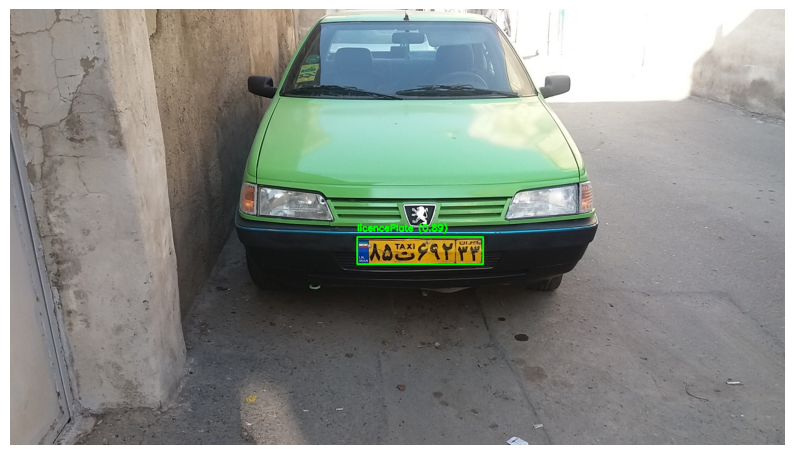


image 1/1 /content/IR-LPD/images/004456.jpg: 480x640 1 licencePlate, 337.4ms
Speed: 8.1ms preprocess, 337.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


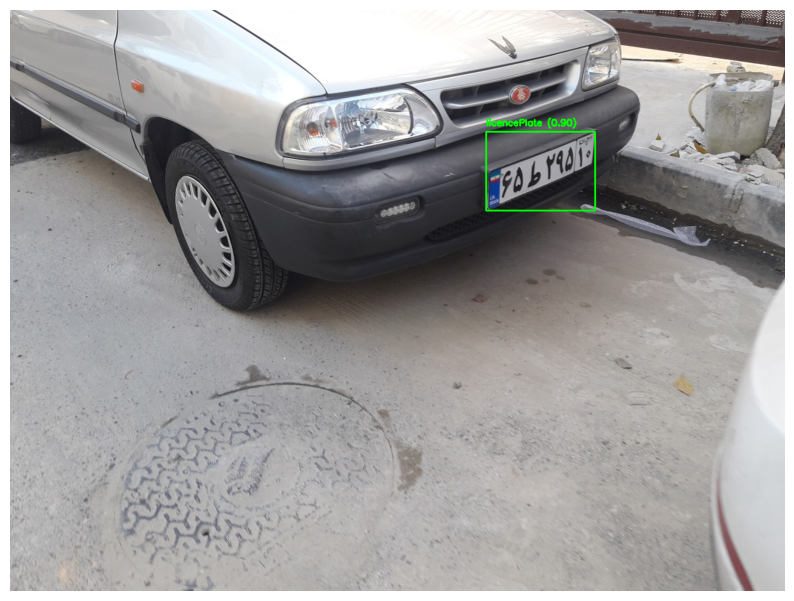


image 1/1 /content/IR-LPD/images/001531.jpg: 384x640 1 licencePlate, 265.4ms
Speed: 3.4ms preprocess, 265.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


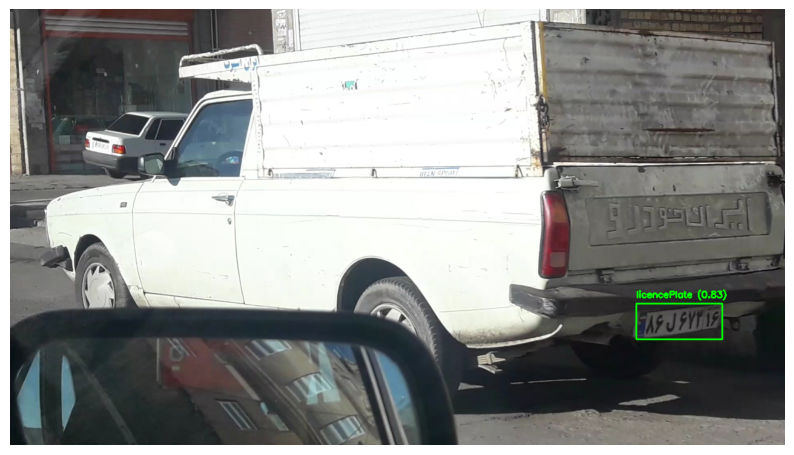


image 1/1 /content/IR-LPD/images/005205.jpg: 640x480 1 licencePlate, 298.1ms
Speed: 9.3ms preprocess, 298.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


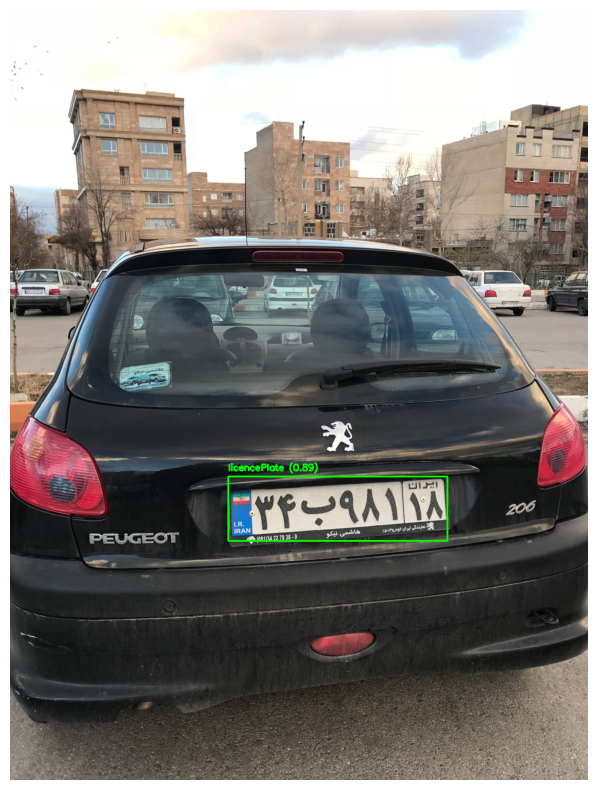


image 1/1 /content/IR-LPD/images/006019.jpg: 640x384 1 licencePlate, 267.5ms
Speed: 4.6ms preprocess, 267.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


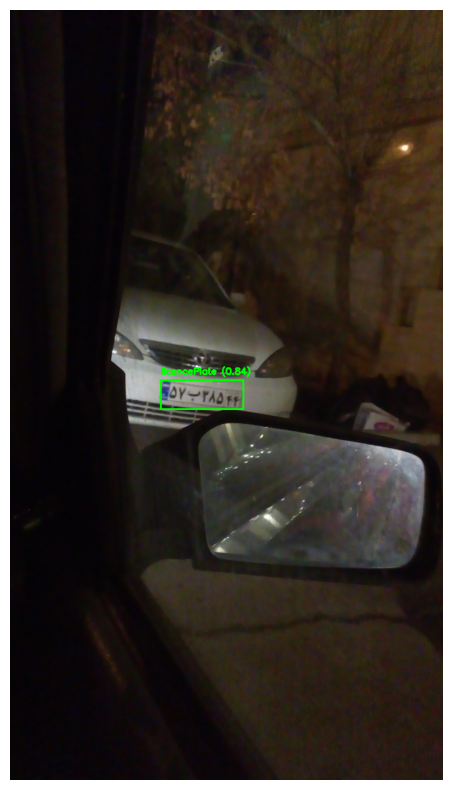

In [ ]:
%matplotlib inline

print("Testing model on sample images...")
for img_file in random.sample(image_files, 5):
    img_path = os.path.join(images_dir, img_file)
    results = LPD_model.predict(source=img_path, imgsz=640)
    bounding_boxes = []
    for box in results[0].boxes.data.tolist():
        x_min, y_min, x_max, y_max, confidence, class_id = box
        label = f"{LPD_model.names[int(class_id)]} ({confidence:.2f})"  # Map class ID to label and include confidence
        bounding_boxes.append([int(x_min), int(y_min), int(x_max), int(y_max), label])

        image = cv2.imread(img_path)
        for box in bounding_boxes:
            x_min, y_min, x_max, y_max, label = box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=2)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()


### 2. LPR - CNN

In [24]:
LPR_RELATIVE_PATH = 'IR-LPR'
df = pd.read_csv(f'{BASE_PATH}/{LPR_RELATIVE_PATH}/valid_samples.csv')
df = df.sample(n=22000, random_state=42)

In [25]:
digit_vocabulary = "0123456789"
persian_letters = "آ ب پ ت ث ج چ ح خ د ذ ر ز ژ س ش ص ض ط ظ ع غ ف ق ک گ ل م ن و ه ی".split()


digit_to_idx = {char: idx for idx, char in enumerate(digit_vocabulary)}
letter_to_idx = {char: idx for idx, char in enumerate(persian_letters)}
idx_to_digit = {idx: char for idx, char in enumerate(digit_vocabulary)}
idx_to_letter = {idx: char for idx, char in enumerate(persian_letters)}


persian_to_english_digits = {
    '۰': '0', '۱': '1', '۲': '2', '۳': '3', '۴': '4',
    '۵': '5', '۶': '6', '۷': '7', '۸': '8', '۹': '9'
}

persian_letter_normalization = {
    "الف": "آ",
    "ا" : "آ",
    "ژ (معلولین و جانبازان)": "ژ",
    "ه‍" : "ه"
}



def translate(label):

    first_two_digits = ''.join([persian_to_english_digits.get(char, char) for char in label[:2]])
    persian_letter = label[2]
    remaining_digits = ''.join([persian_to_english_digits.get(char, char) for char in label[3:]])
    return first_two_digits + persian_letter + remaining_digits


def preprocess_sample(image_path, label , full_transform=True, log=False, dir_path = BASE_PATH , relative_path= f'{LPR_RELATIVE_PATH}/detections', language='en'):

    if language == 'fa' :
      label = translate(label)

    elif language != 'en':
          raise Exception('Un-supported language!')

    path = f'{dir_path}/{relative_path}'

    train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                         std=[0.2675, 0.2565, 0.2761]),
    ])

    test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                         std=[0.2675, 0.2565, 0.2761]),
    ])




    transform = train_transform if full_transform else test_transform
    image = Image.open(f'{path}/{image_path}').convert("RGB")
    #print("image pre_transformed : ",image.shape)
    image = transform(image)
    #print("image after_transformed : ",image.shape)

    for key, value in persian_letter_normalization.items():
        label = label.replace(key, value)



    if log:
      print(label)

      for i , c in enumerate(label):
        if c in persian_letters:
          c = '*'
        print(f"{i}:{c}", end=' | ')

      print()


    digits = [digit_to_idx[char] for char in label if char.isdigit()]
    letter = letter_to_idx[label[2]]

    return image, digits, letter

In [77]:
class PLPRDataset(data.Dataset):
    def __init__(self, df , split='train',dir_path=BASE_PATH,relative_path = f'{LPR_RELATIVE_PATH}/detections', language='en'):
        self.df = df
        self.full_transform = True if split == 'train' else False
        self.dir_path = dir_path
        self.relative_path = relative_path
        self.language = language

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_file = self.df.iloc[idx]['img_path']
        label = self.df.iloc[idx]['label']

        image, digits, letter = preprocess_sample(
            image_path=image_file,
            label=label,
            full_transform=self.full_transform,
            dir_path=self.dir_path,
            relative_path=self.relative_path,
            language=self.language
        )

        digits_tensor = torch.tensor(digits, dtype=torch.long)
        letter_tensor = torch.tensor(letter, dtype=torch.long)

        return image, digits_tensor, letter_tensor,image_file


In [27]:
import torch
import torch.nn as nn
import torchvision.models as models

class FCNPLPRModel(nn.Module):
    def __init__(self, backbone_name="efficientnet_b0", num_persian_letters=len(persian_letters), num_digits=10):
        super(FCNPLPRModel, self).__init__()

        if backbone_name == "efficientnet_b0":
            self.backbone = models.efficientnet_b0(pretrained=True)
        else:
            raise ValueError(f"Unsupported backbone: {backbone_name}")

        self.feature_extractor = nn.Sequential(*list(self.backbone.children())[:-2])

        self.digit_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1280*7*7, 512),
            nn.ReLU(),
            nn.Linear(512, 7 * num_digits)
        )

        self.letter_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1280*7*7, 512),
            nn.ReLU(),
            nn.Linear(512, num_persian_letters)
        )

    def forward(self, x):
        #("GGGGGGGGGGGGGGGG")
        features = self.feature_extractor(x)
        #print("feature_shape : " ,features.shape)
        digit_outputs = self.digit_head(features)
        digit_outputs = digit_outputs.view(x.size(0), 7, 10)

        letter_output = self.letter_head(features)

        return digit_outputs, letter_output

In [28]:
learning_rate = 4e-4
batch_size = 32

In [71]:
dataset = PLPRDataset(df)
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True,
        # persistent_workers=True
)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [84]:
LPR_model = FCNPLPRModel().to(device)
digit_criterion = nn.CrossEntropyLoss()
letter_criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [45]:
optimizer = optim.AdamW(LPR_model.parameters(), lr=learning_rate)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=2,
    threshold=0.05,
    threshold_mode='rel',
    verbose=True
)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [58]:
def decode_predictions(digit_outputs, letter_output):
    digit_predictions = torch.argmax(digit_outputs, dim=2)  # [batch_size, 7]
    batch_size = digit_predictions.size(0)

    digits = []
    for b in range(batch_size):  # Iterate over batch
        sample_digits = []
        for i in range(7):  # Iterate over 7 digits
            try:
                sample_digits.append(idx_to_digit[digit_predictions[b][i].item()])
            except KeyError as e:
                print(f"KeyError: {e} (digit_predictions[{b}][{i}] = {digit_predictions[b][i].item()})")
                sample_digits.append("?")  # Use a placeholder for invalid indices
        digits.append(sample_digits)

    letter_prediction = torch.argmax(letter_output, dim=1)  # [batch_size]
    letters = []
    for b in range(batch_size):
        try:
            letters.append(idx_to_letter[letter_prediction[b].item()])
        except KeyError as e:
            print(f"KeyError: {e} (letter_prediction[{b}] = {letter_prediction[b].item()})")
            letters.append("?")  # Use a placeholder for invalid indices

    labels = []
    for b in range(batch_size):
        label = "".join(digits[b][:2]) + letters[b] + "".join(digits[b][2:])
        labels.append(label)

    return labels



def evaluate_misclassification(gt, pred):
    assert len(gt) == len(pred), "GT and Pred must have the same length."

    # Collect misclassified characters
    misclassified = []
    char_error_count = 0

    for i, (gt_char, pred_char) in enumerate(zip(gt, pred)):
        if gt_char != pred_char:
            misclassified.append(f"{gt_char} with {pred_char} at pos {i}")
            char_error_count += 1

    # Format the output
    misclassified_str = " , ".join(misclassified) if misclassified else "None"
    result = (f"GT: {gt} | Pred: {pred} | "
              f"Misclassified: {misclassified_str} | "
              f"Char error count: {char_error_count}")

    return result , char_error_count





def calculate_accuracy(model, df, device, dir_path=BASE_PATH, relative_path=f'{LPR_RELATIVE_PATH}/detections', language='en', log=False , cer = False):
    model.eval()
    FP= []
    CE = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for _, row in tqdm(df.iterrows(), total=len(df)):
            image_path = row["img_path"]
            label = row["label"]
            try:
                image, true_digits, true_letter = preprocess_sample(image_path, label, full_transform=False, dir_path=dir_path, relative_path=relative_path, language=language)

            except Exception as e:
                print(f"Error processing {image_path}: {e}")
                continue
            true_label = "".join([digit_vocabulary[d] for d in true_digits[:2]]) \
                         + persian_letters[true_letter] \
                         + "".join([digit_vocabulary[d] for d in true_digits[2:]])
            image = image.unsqueeze(0).to(device)
            digit_outputs, letter_output = model(image)

            predicted_labels = decode_predictions(digit_outputs, letter_output)

            if predicted_labels[0] == true_label:
                correct += 1
            elif log:
                report , char_error_count = evaluate_misclassification(true_label,predicted_labels[0])
                CE += char_error_count
                FP.append(report)
            total += 1


    accuracy = correct / total * 100

    if cer:
        print(f'CER: {100* CE/(8*df.shape[0]): .4f}%')

    if log:
         for false_positive in FP:
            print(false_positive)



    return accuracy

In [73]:
full_df = pd.read_csv(f'{BASE_PATH}/IR-LPR/valid_samples.csv')
test_df = full_df.loc[~full_df.index.isin(df.index)]


In [60]:
best_accuracy = 85.0
optimal_weights = None
num_epochs = 10


for epoch in range(num_epochs):
    LPR_model.train()
    total_loss = 0
    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)

    for images, digit_targets, letter_targets in progress_bar:
        images = images.to(device)
        digit_targets = digit_targets.to(device)
        letter_targets = letter_targets.to(device)

        # Forward pass
        #print("image amd didgital letter and letter targets .shape" ,images.shape ,digit_targets.shape, letter_targets.shape)
        digit_outputs, letter_output = LPR_model(images)

        digit_loss = 0
        for i in range(7):
            digit_loss += digit_criterion(digit_outputs[:, i, :], digit_targets[:, i])
        letter_loss = letter_criterion(letter_output, letter_targets)
        loss = digit_loss + letter_loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

    LPR_model.eval()
    accuracy = calculate_accuracy(
        LPR_model,
        test_df,
        device,
        relative_path= f'{LPR_RELATIVE_PATH}/detections',
        language='en'
    )
    print(f"Accuracy after Epoch {epoch+1}: {accuracy:.2f}%")

    scheduler.step(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        optimal_weights = LPR_model.state_dict()  # Save the current model weights
        print(f"New best accuracy: {best_accuracy:.2f}%. Saving model weights.")
        torch.save(LPR_model.state_dict(), f'{BASE_PATH}/model/PLPR-CNN.pth')

if optimal_weights is not None:
    LPR_model.load_state_dict(optimal_weights)
    print("Loaded optimal weights into the model.")

Epoch 1/10, Average Loss: 0.1086


100%|██████████| 2561/2561 [00:36<00:00, 69.32it/s]


Accuracy after Epoch 1: 89.65%
New best accuracy: 89.65%. Saving model weights.


Epoch 2/10, Average Loss: 0.0429


100%|██████████| 2561/2561 [00:36<00:00, 69.66it/s]


Accuracy after Epoch 2: 88.79%


Epoch 3/10, Average Loss: 0.0460


100%|██████████| 2561/2561 [00:36<00:00, 69.51it/s]


Accuracy after Epoch 3: 88.05%


Epoch 4/10, Average Loss: 0.0299


100%|██████████| 2561/2561 [00:36<00:00, 70.51it/s]


Accuracy after Epoch 4: 90.36%
New best accuracy: 90.36%. Saving model weights.


Epoch 5/10, Average Loss: 0.0168


100%|██████████| 2561/2561 [00:35<00:00, 71.54it/s]


Accuracy after Epoch 5: 91.06%
New best accuracy: 91.06%. Saving model weights.


Epoch 6/10, Average Loss: 0.0155


100%|██████████| 2561/2561 [00:36<00:00, 70.37it/s]


Accuracy after Epoch 6: 90.67%


Epoch 7/10, Average Loss: 0.0113


100%|██████████| 2561/2561 [00:37<00:00, 69.07it/s]


Accuracy after Epoch 7: 90.98%


Epoch 8/10, Average Loss: 0.0052


100%|██████████| 2561/2561 [00:36<00:00, 69.73it/s]


Accuracy after Epoch 8: 91.21%
New best accuracy: 91.21%. Saving model weights.


Epoch 9/10, Average Loss: 0.0054


100%|██████████| 2561/2561 [00:36<00:00, 70.61it/s]


Accuracy after Epoch 9: 91.29%
New best accuracy: 91.29%. Saving model weights.


Epoch 10/10, Average Loss: 0.0053


100%|██████████| 2561/2561 [00:37<00:00, 68.89it/s]

Accuracy after Epoch 10: 91.02%
Loaded optimal weights into the model.


In [85]:
# Initialize the model class
LPR_model = FCNPLPRModel()  # Replace PLPRModel with your actual model class

# Load the state_dict into the model
model_path = '/content/drive/MyDrive/Colab Notebooks/PLPR-CNN.pth'
LPR_model.load_state_dict(torch.load(model_path))



<All keys matched successfully>

In [61]:
# Calculate accuracy
accuracy = calculate_accuracy(LPR_model, test_df, device, cer=True, log=True)
print(f"Accuracy: {accuracy:.2f}%")

100%|██████████| 2561/2561 [00:41<00:00, 61.39it/s]

CER:  1.6449%
GT: 57ژ46711 | Pred: 57ط46711 | Misclassified: ژ with ط at pos 2 | Char error count: 1
GT: 52ع35813 | Pred: 52ع35812 | Misclassified: 3 with 2 at pos 7 | Char error count: 1
GT: 45ت87733 | Pred: 45ت87732 | Misclassified: 3 with 2 at pos 7 | Char error count: 1
GT: 21ت13611 | Pred: 21ت13631 | Misclassified: 1 with 3 at pos 6 | Char error count: 1
GT: 91ی36388 | Pred: 61ی36388 | Misclassified: 9 with 6 at pos 0 | Char error count: 1
GT: 74ه62255 | Pred: 76ه67255 | Misclassified: 4 with 6 at pos 1 , 2 with 7 at pos 4 | Char error count: 2
GT: 98ه75211 | Pred: 97ه75211 | Misclassified: 8 with 7 at pos 1 | Char error count: 1
GT: 87ه59611 | Pred: 82ه59611 | Misclassified: 7 with 2 at pos 1 | Char error count: 1
GT: 64ه65878 | Pred: 64ه65888 | Misclassified: 7 with 8 at pos 6 | Char error count: 1
GT: 42ن93839 | Pred: 42ن94831 | Misclassified: 3 with 4 at pos 4 , 9 with 1 at pos 7 | Char error count: 2
GT: 16ن61233 | Pred: 16ن61222 | Misclassified: 3 with 2 at pos 6 , 3 with 2 

### 3. E2E LPDR

load the models from part 2 and 3, build a class named E2E_LPDR and plot report the metrics (accuracy and cer) for the test dataset (20% of LPD that has Splitted in section 1 ). you must also plot some samples with predicted bounding box and label too.


note that each picture might have multiple plates but in this test data for simplicity all samples just have a single plate exists in it.
plot some samples from your pipeline (predicted bb from an image + predicted label of it)


In [62]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from PIL import Image

class E2E_LPDR:
    def __init__(self, bbox_model, recognition_model, test_dataset):
        self.bbox_model = bbox_model
        self.recognition_model = recognition_model
        self.test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    def predict(self, image_path):
        bbox_results = self.bbox_model.predict(source=image_path, imgsz=640)

        if  len(bbox_results[0])==0:
            print(f"No bounding box found for image: {image_path}")
            return None, None, None
        bounding_box = bbox_results[0].boxes.xyxy[0].tolist()

        image = cv2.imread(image_path)
        x_min, y_min, x_max, y_max = map(int, bounding_box)

        cropped_plate = image[y_min:y_max, x_min:x_max]
        cropped_plate = cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB)
        cropped_plate = Image.fromarray(cropped_plate)
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761]),
        ])
        cropped_plate = transform(cropped_plate).unsqueeze(0)
        digit_outputs, letter_output = self.recognition_model(cropped_plate)

        digits = torch.argmax(digit_outputs, dim=-1).squeeze().tolist()
        letter = torch.argmax(letter_output, dim=-1).item()

        return bounding_box, digits, letter

    def evaluate(self):
        total_images = 0
        correct_predictions = 0
        total_cer = 0

        for image, label_digits, label_letter, image_path in self.test_loader:
            bounding_box, predicted_digits, predicted_letter = self.predict(f'/content/IR-LPD/images/{image_path[0]}')

            if bounding_box is None:
                continue

            if (predicted_digits == label_digits.tolist()) and (predicted_letter == label_letter.item()):
                correct_predictions += 1

            total_cer += self.calculate_cer(label_digits.tolist(), predicted_digits)

            total_images += 1

        accuracy = (correct_predictions / total_images) * 100 if total_images > 0 else 0
        cer = total_cer / total_images if total_images > 0 else 0

        print(f"Accuracy: {accuracy:.2f}%")
        print(f"CER: {cer:.2f}")
        return accuracy, cer
    @staticmethod
    def calculate_cer(true_digits, predicted_digits):
        errors = sum([true != pred for true, pred in zip(true_digits, predicted_digits)])
        cer = errors / len(true_digits)
        return cer

    def visualize_predictions(self, num_samples=5):
        samples = list(self.test_loader)
        for i in range(min(num_samples, len(samples))):
            image, label_digits, label_letter, image_path = samples[i]
            bounding_box, predicted_digits, predicted_letter = self.predict(f'/content/IR-LPD/images/{image_path[0]}')
            if bounding_box is None:
                print(f"No bounding box found for visualization: {image_path[0]}")
                continue

            image = cv2.imread(f'/content/IR-LPD/images/{image_path[0]}')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            x_min, y_min, x_max, y_max = map(int, bounding_box)

            plt.figure(figsize=(6, 6))
            plt.imshow(image)
            plt.gca().add_patch(plt.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min,
                edgecolor='red', facecolor='none', linewidth=2
            ))
            predicted_label = f"{''.join(map(str, predicted_digits))}{idx_to_letter[predicted_letter]}"
            plt.title(f"Predicted Label: {predicted_label}", fontsize=12)
            plt.axis('off')
            plt.show()

In [ ]:
bbox_model = LPD_model
recognition_model = LPR_model

# Load test dataset (20% split from section 1)
test_dataset = PLPRDataset(val_df,relative_path = 'IR-LPD/images')

#Initialize the E2E_LPDR pipeline
pipeline = E2E_LPDR(bbox_model, recognition_model, test_dataset)

#Evaluate metrics
accuracy, cer = pipeline.evaluate()



image 1/1 /content/IR-LPD/images/val/000900.jpg: 640x480 1 licencePlate, 16.3ms
Speed: 2.2ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /content/IR-LPD/images/val/003066.jpg: 480x640 1 licencePlate, 78.7ms
Speed: 2.9ms preprocess, 78.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/IR-LPD/images/val/004648.jpg: 640x384 2 licencePlates, 108.6ms
Speed: 1.7ms preprocess, 108.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/IR-LPD/images/val/004517.jpg: 640x384 1 licencePlate, 17.8ms
Speed: 1.7ms preprocess, 17.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /content/IR-LPD/images/val/000269.jpg: 480x640 1 licencePlate, 19.9ms
Speed: 2.1ms preprocess, 19.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/IR-LPD/images/val/002347.jpg: 480x640 3 licencePlates, 15.0ms
Speed: 2.2ms preprocess, 


image 1/1 /content/IR-LPD/images/val/004507.jpg: 480x640 3 licencePlates, 15.5ms
Speed: 2.2ms preprocess, 15.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


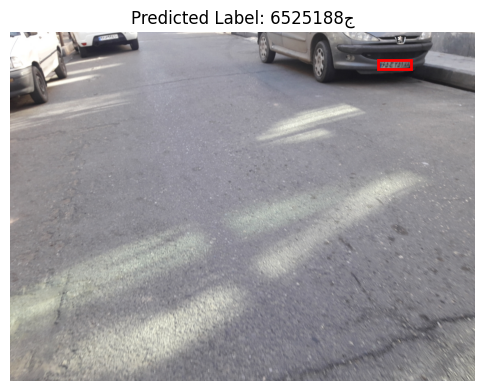


image 1/1 /content/IR-LPD/images/val/004391.jpg: 480x640 1 licencePlate, 19.9ms
Speed: 2.8ms preprocess, 19.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


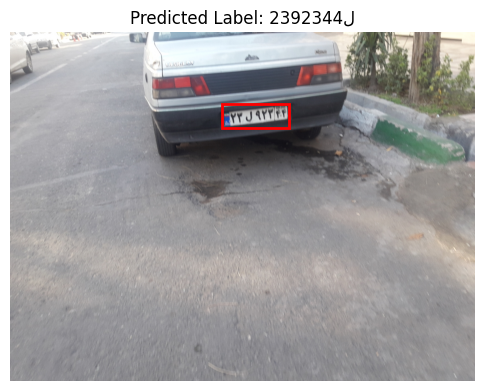


image 1/1 /content/IR-LPD/images/val/001017.jpg: 480x640 1 licencePlate, 23.3ms
Speed: 2.1ms preprocess, 23.3ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


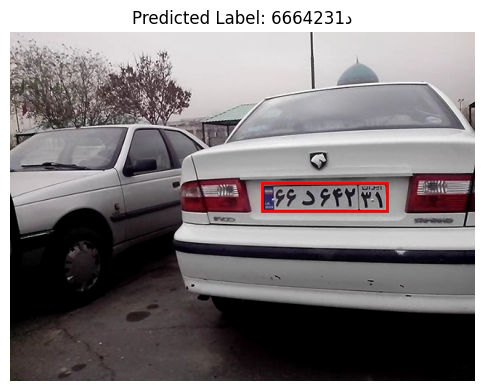


image 1/1 /content/IR-LPD/images/val/000217.jpg: 640x480 1 licencePlate, 27.9ms
Speed: 2.7ms preprocess, 27.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


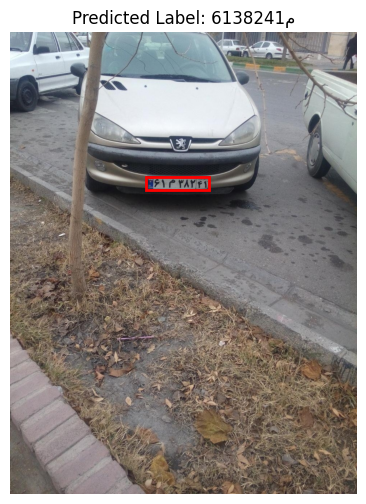


image 1/1 /content/IR-LPD/images/val/003135.jpg: 512x640 1 licencePlate, 22.4ms
Speed: 3.8ms preprocess, 22.4ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


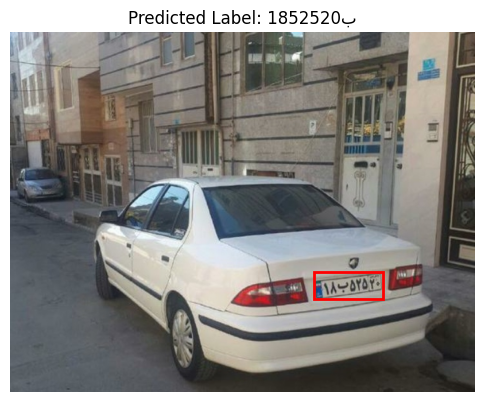

In [ ]:
pipeline.visualize_predictions(num_samples=5)